# Execution environment

In [1]:
import random
import math
import matplotlib.pyplot as plt
import time

### Fish

In [4]:
# Submission

def simple_fish(turn, credit, population, food, pool_level, food_price, fry_price, expand_price, *args, **kwargs):
    def calc_capacity(pool_level):
        return 100 * pool_level ** 2
    fry = 0
    if population == 0:
        fry = 15
        credit = credit - fry * fry_price
    capacity = calc_capacity(pool_level)
    harvest = min(population/1.5, population ** 3/capacity/7)
    credit = credit + harvest
    feed = max([0, min([capacity * 2.5 - food, (credit-1) / food_price])])
    credit = credit - feed * food_price
    expand = 0
    if capacity < 2000:
        if credit >= expand_price * calc_capacity(pool_level+1) * 1.2:
            expand = 1
    if capacity > 2000:
        if credit >= expand_price * calc_capacity(pool_level+3) * 1.05:
            expand = 3
    return [harvest, feed, fry, expand], [], {}

def rule_fish(a,b,c,d,e,f,g,h,*args,**kwargs):
    cc=lambda x:(100*x**2)
    l=0
    m=0
    n=0
    o=0
    p=cc(e)
    s = 1.4 if not a else kwargs['s']
    def gg(c,d):
        u=c
        y=0
        for i in range(60):
            v=c*0.02*min([d/p,1])
            if d<=0:
                v=0
            y=y+v
            w=v*(1-c/p)
            x=max(0,c*0.001*1.5*(2-d/p))
            d=max(0,d-v)
            c=max(c+w-x,0)
        return c-u-y*f
    def ee(i,j):
        ii=0
        fi=0
        jj=0
        fj=0
        z=p*s
        t=d//1+(b+c-i-1)//f
        if z < t:
            ii = gg(i,z)
            fi = z
        else:
            ii = gg(i,t)
            fi = t
        t=d//1+(b+c-j-1)//f
        if z < t:
            jj = gg(j,z)
            fj = z
        else:
            jj = gg(j,t)
            fj = t 
        if abs(i-j)<p*0.01:
            return [i, fi]
        if jj>ii:
            return ee(max((j+i)//2,i+1),j)
        else:
            return ee(i,min((j+i)//2,j-1))
    if not c:
        n=b/g/1.5
        b=b-g*n
        m=(b-1)//f
    else:
        if d < p*2:
            s=s+0.05
        elif d > p*2.1:
            s=s-0.04
        res=ee(0,c//1)
        q=res[0]
        r=res[1]
        l=max(0,c-q)
        m=max(0,r-d)
        b=b+l-n*m
        if a<140:
            if e < 6:
                if b>h*cc(e+1)*1.2:
                    o=1
            elif e < 16:
                if b>h*cc(e+2)*1.1:
                    o=2
            else:
                if b>h*cc(e+3)*1.05:
                    o=3
    return [l,m,n,o], [], {'s':s}



### Test

1342.7598017538264
0.2844839096069336


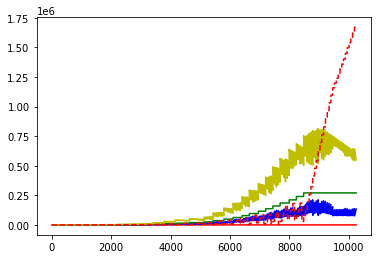

In [8]:
start = time.time()
print(episode(rule_fish,168,43))
print(time.time()-start)

In [6]:
def episode(agent,steps,seed=random.randint(0,1000)):
    random.seed(seed)
    credit = 100 #b
    population = 0 #c
    food = 0 #d
    pool_level = 1 #e
    food_price = random.uniform(0.4/3,0.3) #f
    fry_price =  random.uniform(4/3,3) #g
    expand_price = random.uniform(2/3,1.5) #h

    consume_rate = 0.02
    death_rate = 0.001
    args = []
    kwargs = {}

    # Display Data
    xAxis = [0]
    deathsD = [0]
    populationD = [0]
    capacityD = [100]
    creditD = [100]
    foodD = [0]

    for turn in range(steps):
        consume_rate = consume_rate + random.uniform(-0.004,0.004)
        death_rate = death_rate + random.uniform(-0.0002,0.0002)
        death_rate = min(death_rate,0.001*1.5)
        death_rate = max(death_rate,0.001*2/3)
        consume_rate = min(consume_rate,0.02*1.5)
        consume_rate = max(consume_rate,0.02*2/3)

        action, args, kwargs = agent(turn, credit, population, food, pool_level, food_price, fry_price, expand_price, *args, **kwargs)

        capacity = 100 *pool_level ** 2

        deathsD.append(deathsD[-1])
        populationD.append(population)
        foodD.append(food)
        creditD.append(credit)
        capacityD.append(capacity)
        xAxis.append(xAxis[-1]+1)

        if population > action[0]:
            population = population - action[0]
            credit += action[0]
        if credit - action[1] * food_price > 0:
            credit = credit - action[1] * food_price
            food += action[1]
        if credit - action[2] * fry_price > 0:
            credit = credit - action[2] * fry_price
            population += action[2]
        
        if action[3] > 0:
            new_capacity = 100 * (pool_level + action[3]) ** 2
            if credit - new_capacity * expand_price > 0:
                credit = credit - new_capacity * expand_price
                pool_level += action[3]

        for minute in range(60):
            eat = population * consume_rate * min([food / capacity, 1])
            if food == 0:
                eat = 0
            grown = eat * (1 - population / capacity)
            death = max(0,population * death_rate * (2. - food / capacity))
            food = max(0,food - eat)
            population = population + grown - death
            if population < 0:
                population = 0
            
            xAxis.append(xAxis[-1]+1)
            deathsD.append(deathsD[-1] + death)
            populationD.append(population)
            foodD.append(food)
            creditD.append(credit)
            capacityD.append(capacity)
    plt.plot(xAxis,deathsD,'r-',xAxis,populationD,'b-',xAxis,capacityD,'g-',xAxis,foodD,'y-',xAxis,creditD,'r--')
    return (population+credit)**0.5


==== 10
==== 20
==== 30
==== 40
==== 50
==== 60
==== 70
==== 80
==== 90
[62, 101.12427299317834] [43, 1340.3245170776431] 445.9371132970419 [77, 0.35454392433166504]


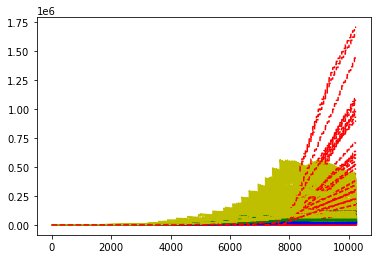

In [202]:
# Simple eval
agent = rule_fish

score = 0
lowest = [0, episode(agent,168,0)]
start = time.time()
highest = [0,episode(agent,168,0)]
highest_time = [0,time.time()-start]
for seed in range(1,100):
    if seed%10 == 0:
        print("====",seed)
    start = time.time()
    a = episode(agent,168,seed)
    res = time.time()-start
    if res > highest_time[1]:
        highest_time=[seed,res]
    score += 0.01 * a
    if lowest[1] > a:
        lowest = [seed,a]
    if highest[1] < a:
        highest = [seed,a]
print(lowest,highest,score,highest_time)
